### IDs:
Insert yours IDs to the cell below

ID #1: 204079453

ID #2: 205714447


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [71]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
from numpy.linalg import matrix_power

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [73]:
# following the requirements to calculate the number of attempts given the probability and the number of successes, 
# we choosed a negative binomial distribution.

In [74]:
def get_samples_size(p, min_def_products, x_prob):
    sum_prob = 0
    n = min_def_products
    p_x = stats.nbinom(n, p, loc=min_def_products)
    while True: 
        prob = p_x.cdf(n)
        if prob >= x_prob:
            return n
        n += 1    

In [75]:
p = 0.03
min_def_products = 1
x_prob = 0.85

In [76]:
n = get_samples_size(p ,min_def_products , x_prob)
result_in_prec = x_prob*100

print(f"The number of independent samples in order to have {result_in_prec}% probability of having at least one defective product are {n}")


The number of independent samples in order to have 85.0% probability of having at least one defective product are 63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [77]:
p = 0.04
min_def_products = 1
x_prob = 0.95

In [78]:
n = get_samples_size(p ,min_def_products , x_prob)
result_in_prec = x_prob*100

print(f"The number of independent samples in order to have {result_in_prec}% probability of having at least one defective product are {n}")


The number of independent samples in order to have 95.0% probability of having at least one defective product are 74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [79]:
## We need to add visualization ##

In [80]:
#1:
p = 0.1
min_def_products = 5
x_prob = 0.9

In [81]:
n1 = get_samples_size(p ,min_def_products , x_prob)
result_in_prec = x_prob*100

print(f"The number of independent samples in order to have {result_in_prec}% probability of having at least one defective product are {n1}")


The number of independent samples in order to have 90.0% probability of having at least one defective product are 78


In [82]:
#2:
p = 0.3
min_def_products = 15
x_prob = 0.9

In [83]:
n2 = get_samples_size(p ,min_def_products , x_prob)
result_in_prec = x_prob*100

print(f"The number of independent samples in order to have {result_in_prec}% probability of having at least one defective product are {n2}")


The number of independent samples in order to have 90.0% probability of having at least one defective product are 64


In [84]:
p_1, p_2 = 0.1, 0.3
r_1, r_2 = 5, 15 

prob_target = 0.9

X1 = stats.nbinom(r_1, p_1, loc=r_1)
X2 = stats.nbinom(r_2, p_2, loc=r_2)

i = np.arange(0,100)

## mathematical and visualization explanation:

$Var(X) = \frac{r(1-p)}{p^2}$ 
<br><br>$Var(X_1) = \frac{5(0.9)}{0.1^2} =$ <b>449.99</b> $>Var(X_2) = \frac{15(0.7)}{0.3^2} = $<b>116.66</b> 

In [85]:
#v_x1 = (r_1*(1-p_1))/((p_1)**2)
#v_x2 = (r_2*(1-p_2))/((p_2)**2)

In [86]:
excpected_value = r_1/p_1

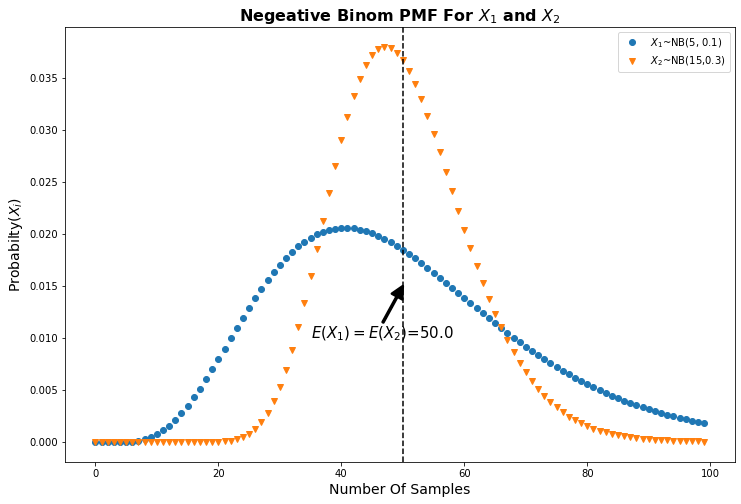

In [87]:
fig, axes = plt.subplots(figsize=(12,8))

plt.plot(i, X1.pmf(i),'o')
plt.plot(i, X2.pmf(i),'v')

plt.xlabel("Number Of Samples" ,fontsize = 14)
plt.ylabel("Probabilty($X_i$)", fontsize = 14)

plt.title("Negeative Binom PMF For $X_1$ and $X_2$", fontsize = 16, fontweight='bold')

ax = plt.gca()
ax.axvline(excpected_value, c='black',linestyle='--')

ax.annotate('$E(X_1)=E(X_2)$='+str(excpected_value), xy=(excpected_value,0.015), xytext=(35,0.01),size=15, arrowprops=dict(width=1, fc='black',lw=2.5))


plt.legend(["$X_1$~NB(5, 0.1)", "$X_2$~NB(15,0.3)"])

plt.show()

Following the mathematical explanation, it can be seen that the values' distribution of $X_1$ is wider than $X_2$

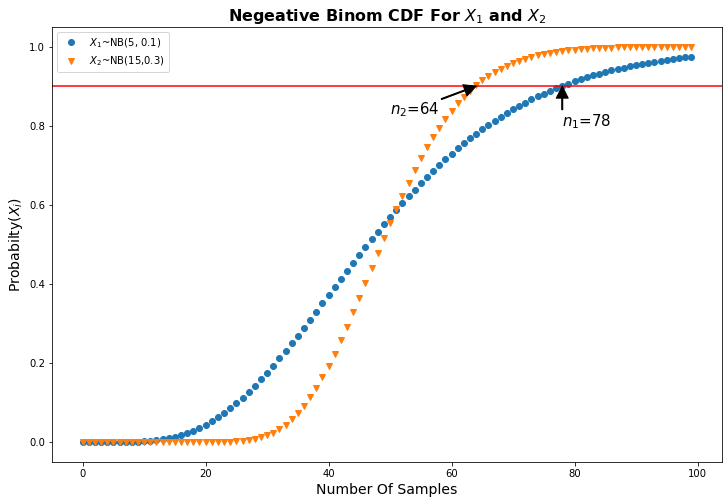

In [88]:
fig, axes = plt.subplots(figsize=(12,8))

plt.plot(i, X1.cdf(i),'o')
plt.plot(i, X2.cdf(i),'v')

plt.xlabel("Number Of Samples" ,fontsize = 14)
plt.ylabel("Probabilty($X_i$)", fontsize = 14)

plt.title("Negeative Binom CDF For $X_1$ and $X_2$", fontsize = 16, fontweight='bold')

plt.legend(["$X_1$~NB(5, 0.1)", "$X_2$~NB(15,0.3)"])

ax = plt.gca()
ax.axhline(prob_target, c='r')

ax.annotate('$n_1$='+str(n1), xy=(n1,prob_target), xytext=(n1,0.8),size=15, arrowprops=dict(width=1, fc='black',lw=1))

ax.annotate('$n_2$='+str(n2), xy=(n2,prob_target), xytext=(50,0.83),size=15, arrowprops=dict(width=1, fc='black',lw=1))

plt.show()

<b>Conclusions:</b>
<br>To explain the difference between the results, 
<br>we examined the negative binomial distribution parameters:
<br>E(X) - As expected, both are equal since the ratio between r and p remains the same.
<br>V(X) - V($X_1$) is higher than V($X_2$). It means that the distribution of $X_1$ is more centralized around the mean. Thus, $X_2$ will reach 90% earlier.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [89]:
def get_statistics_values (town_data):
    
    town_pop = len(town_data)
    mean = np.mean(town_data)
    median = np.median(town_data)
    iqr = stats.iqr(town_data)
    var = np.var(town_data)

    return town_pop, mean, median, iqr, var

In [90]:
def print_descreptive (pop, mean, median, iqr, var):
    print (f"The population is: {pop} \nrent mean: {mean} RCU \nrent median: {median} RCU \nIQR: {iqr} \nVariance: {var}")

In [91]:
def create_hist_plot(array_1, array_2, x_label:str, y_label_1:str, y_label_2:str, plot_title:str):
    
    min_x_axis = min(np.min(array_1), np.min(array_2))-100
    max_x_axis = max(np.max(array_1), np.max(array_2))+100
    bins_list = np.arange(min_x_axis, max_x_axis, 100)
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(14,12))
    
    axes[0].hist(array_1, bins = bins_list, color = "teal",  ec="white")
    axes[1].hist(array_2, bins = bins_list, color = "lightblue",  ec="white")
    
    axes[1].set_xlabel(x_label)
    
    axes[0].set_ylabel(y_label_1)
    axes[1].set_ylabel(y_label_2)
    
    
    fig.suptitle(plot_title, fontsize=14, fontweight='bold')
    axes[0].set_title(y_label_1, fontsize=12, fontweight='bold')
    axes[1].set_title(y_label_2, fontsize=12, fontweight='bold')
        
    plt.show()

In [92]:
#first scenario

### Give explanation why we used 10 values: 

# Generating SH data:

sh_rent_cost_1 = np.array([3900,4200,4350,4400,4500,4700,7650,8500,9800,11000])
sh_rent_cost_all_pop_1 = np.repeat(sh_rent_cost_1, 1600)


In [93]:
sh_pop_1, sh_mean_1, sh_median_1, sh_iqr_1 , sh_var_1= get_statistics_values(sh_rent_cost_all_pop_1)

In [94]:
print("In the first scenario SH sttistics descreptive:")
print_descreptive(sh_pop_1, sh_mean_1, sh_median_1, sh_iqr_1, sh_var_1)

In the first scenario SH sttistics descreptive:
The population is: 16000 
rent mean: 6300.0 RCU 
rent median: 4600.0 RCU 
IQR: 4150.0 
Variance: 6438500.0


In [95]:
# Generating RG data:

rg_rent_cost_1 = np.array([100,300,900,1000,4500,4700,5500,7000,8000,10000])
rg_rent_cost_all_pop_1 = np.repeat(rg_rent_cost_1, 2200)

In [96]:
rg_pop_1, rg_mean_1, rg_median_1, rg_iqr_1, rg_var_1= get_statistics_values(rg_rent_cost_all_pop_1)

In [97]:
print("In the first scenario RG sttistics descreptive:")
print_descreptive(rg_pop_1, rg_mean_1, rg_median_1, rg_iqr_1, rg_var_1)

In the first scenario RG sttistics descreptive:
The population is: 22000 
rent mean: 4200.0 RCU 
rent median: 4600.0 RCU 
IQR: 6100.0 
Variance: 11110000.0


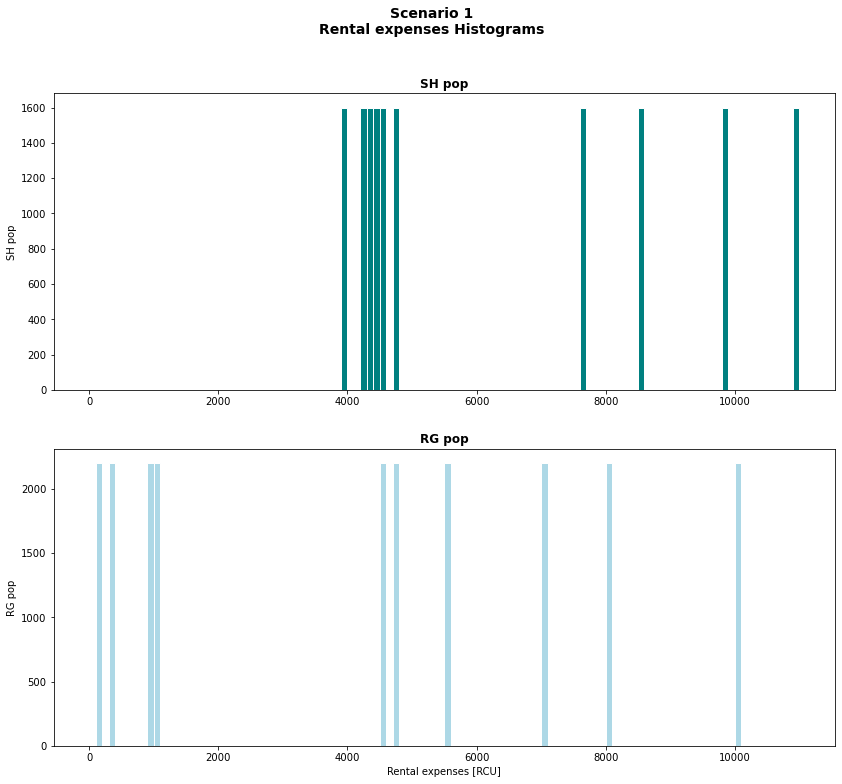

In [98]:
create_hist_plot(sh_rent_cost_all_pop_1, rg_rent_cost_all_pop_1, "Rental expenses [RCU]","SH pop", "RG pop", "Scenario 1\nRental expenses Histograms")



In [99]:
#second scenario
### Give explanation why we used 10 values: 

# Generating SH data:

sh_rent_cost_2 = np.array([3800,4250,4300,4450,4500,4700,7700,7800,10000,11500])
sh_rent_cost_all_pop_2 = np.repeat(sh_rent_cost_2, 1600)

In [100]:
sh_pop_2, sh_mean_2, sh_median_2, sh_iqr_2, sh_var_2 = get_statistics_values(sh_rent_cost_all_pop_2)

In [101]:
print("In the second scenario SH sttistics descreptive:")
print_descreptive(sh_pop_2, sh_mean_2, sh_median_2, sh_iqr_2, sh_var_2)

In the second scenario SH sttistics descreptive:
The population is: 16000 
rent mean: 6300.0 RCU 
rent median: 4600.0 RCU 
IQR: 3500.0 
Variance: 6861500.0


In [102]:
# Generating RG data:

rg_rent_cost_2 = np.array([1000,2000,3100,4300,4400,4800,6000,9000,11400,17000])
rg_rent_cost_all_pop_2 = np.repeat(rg_rent_cost_2, 2200)

In [103]:
rg_pop_2, rg_mean_2, rg_median_2, rg_iqr_2, rg_var_2 = get_statistics_values(rg_rent_cost_all_pop_2)

In [104]:
print("In the second scenario RG sttistics descreptive:")
print_descreptive(rg_pop_2, rg_mean_2, rg_median_2, rg_iqr_2, rg_var_2)

In the second scenario RG sttistics descreptive:
The population is: 22000 
rent mean: 6300.0 RCU 
rent median: 4600.0 RCU 
IQR: 5900.0 
Variance: 21456000.0


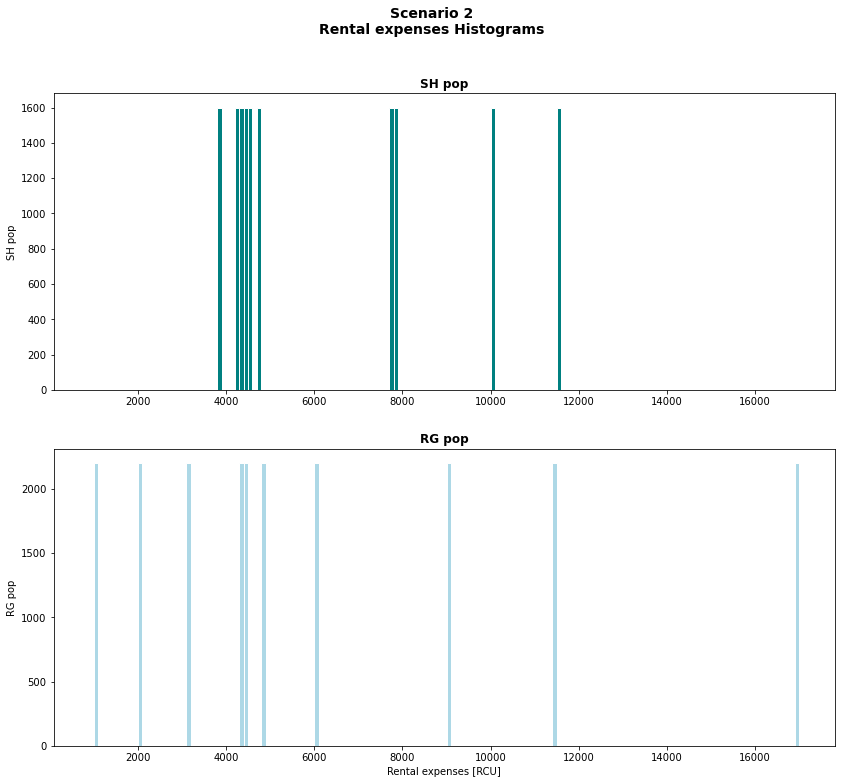

In [105]:
create_hist_plot(sh_rent_cost_all_pop_2, rg_rent_cost_all_pop_2, "Rental expenses [RCU]","SH pop", "RG pop", "Scenario 2\nRental expenses Histograms")


#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [106]:
# Third scenario
### Give explanation why we used 10 values: 

# Generating SH data:

sh_rent_cost_3 = np.array([50,150,2000,2100,4500,4700,7000,7500,11000,24000])
sh_rent_cost_all_pop_3 = np.repeat(sh_rent_cost_3, 1600)

In [107]:
sh_pop_3, sh_mean_3, sh_median_3, sh_iqr_3, sh_var_3 = get_statistics_values(sh_rent_cost_all_pop_3)

In [108]:
print("In the second scenario SH sttistics descreptive:")
print_descreptive(sh_pop_3, sh_mean_3, sh_median_3, sh_iqr_3, sh_var_3)

In the second scenario SH sttistics descreptive:
The population is: 16000 
rent mean: 6300.0 RCU 
rent median: 4600.0 RCU 
IQR: 5500.0 
Variance: 45612500.0


In [109]:
# Generating RG data:

rg_rent_cost_3 = np.array([100,200,500,600,4400,4800,6000,8000,8400,9000])
rg_rent_cost_all_pop_3 = np.repeat(rg_rent_cost_3, 2200)

In [110]:
rg_pop_3, rg_mean_3, rg_median_3, rg_iqr_3, rg_var_3 = get_statistics_values(rg_rent_cost_all_pop_3)

In [111]:
print("In the second scenario RG sttistics descreptive:")
print_descreptive(rg_pop_3, rg_mean_3, rg_median_3, rg_iqr_3, rg_var_3)

In the second scenario RG sttistics descreptive:
The population is: 22000 
rent mean: 4200.0 RCU 
rent median: 4600.0 RCU 
IQR: 7500.0 
Variance: 11822000.0


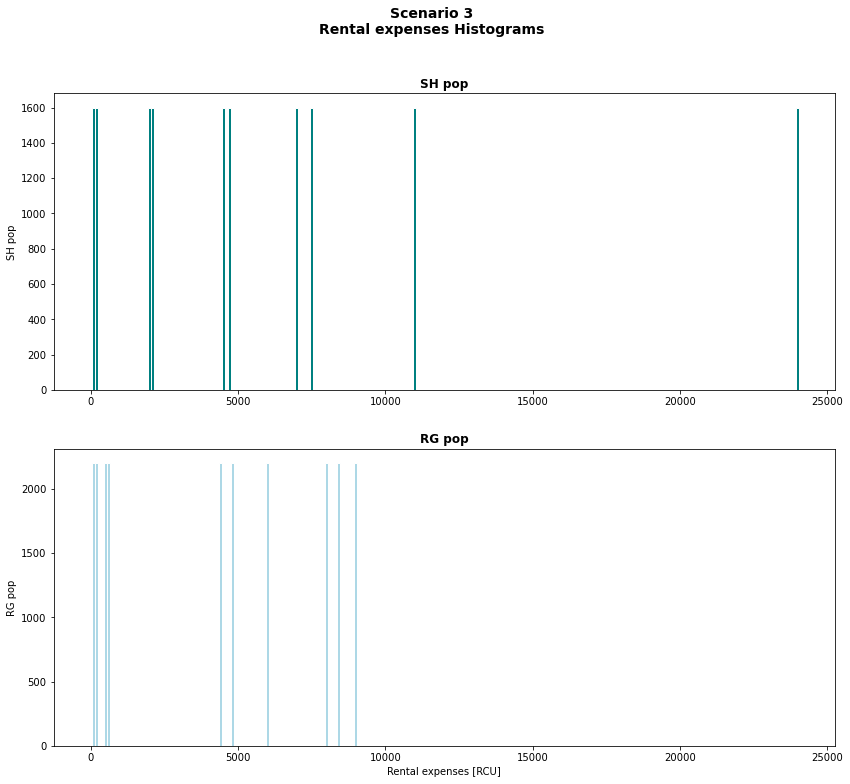

In [112]:
create_hist_plot(sh_rent_cost_all_pop_3, rg_rent_cost_all_pop_3, "Rental expenses [RCU]","SH pop", "RG pop", "Scenario 3\nRental expenses Histograms")



The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [113]:
def get_cov_ratio (phi_data:float, rent_data:float, alpha:float):
    
    phi_var = np.var(phi_data)
    rent_var = np.var(rent_data)
    
    expected_cov = alpha*np.sqrt(phi_var)*np.sqrt(rent_var)
    observed_cov = np.cov(phi_data,rent_data)[0,1]
    
    deviation_from_expected = (observed_cov/expected_cov)*100
    
    return abs(np.round(deviation_from_expected-100,3)) 

In [114]:
sh_rent_cost_all_pop_2c = sh_rent_cost_all_pop_1
sh_pop, sh_rent_mean, sh_rent_median, sh_rent_iqr, sh_rent_var = get_statistics_values(sh_rent_cost_all_pop_2c)

In [115]:
print("SH-rent sttistics descreptive:")
print_descreptive(sh_pop, sh_rent_mean, sh_rent_median, sh_rent_iqr, sh_rent_var)

SH-rent sttistics descreptive:
The population is: 16000 
rent mean: 6300.0 RCU 
rent median: 4600.0 RCU 
IQR: 4150.0 
Variance: 6438500.0


In [116]:
sh_phi_cost = np.array([11100,11200,11300,11400,11500,12500,13400,13600,14300,14700])
sh_phi_cost_all_pop = np.repeat(sh_phi_cost, 1600)

In [117]:
sh_pop, sh_phi_mean, sh_phi_median, sh_phi_iqr, sh_phi_var = get_statistics_values(sh_phi_cost_all_pop)

In [118]:
print("SH-PHI sttistics descreptive:")
print_descreptive(sh_pop, sh_phi_mean, sh_phi_median, sh_phi_iqr, sh_phi_var)

SH-PHI sttistics descreptive:
The population is: 16000 
rent mean: 12500.0 RCU 
rent median: 12000.0 RCU 
IQR: 2300.0 
Variance: 1740000.0


In [119]:
rg_rent_cost_all_pop_2c = rg_rent_cost_all_pop_1
rg_pop, rg_rent_mean, rg_rent_median, rg_rent_iqr, rg_rent_var = get_statistics_values(rg_rent_cost_all_pop_2c)

In [120]:
print("RG-rent sttistics descreptive:")
print_descreptive(rg_pop, rg_rent_mean, rg_rent_median, rg_rent_iqr, rg_rent_var)

RG-rent sttistics descreptive:
The population is: 22000 
rent mean: 4200.0 RCU 
rent median: 4600.0 RCU 
IQR: 6100.0 
Variance: 11110000.0


In [121]:
rg_phi_cost = np.array([2300,6700,6900,7000,7000,9000,9800,10000,11000,15300])
rg_phi_cost_all_pop = np.repeat(rg_phi_cost, 2200)

In [122]:
rg_pop, rg_phi_mean, rg_phi_median, rg_phi_iqr, rg_phi_var = get_statistics_values(rg_phi_cost_all_pop)

In [123]:
print("RG-PHI sttistics descreptive:")
print_descreptive(rg_pop, rg_phi_mean, rg_phi_median, rg_phi_iqr, rg_phi_var )

RG-PHI sttistics descreptive:
The population is: 22000 
rent mean: 8500.0 RCU 
rent median: 8000.0 RCU 
IQR: 3100.0 
Variance: 10542000.0


In [124]:
# SH:

In [125]:
sh_cov_ratio = get_cov_ratio(sh_phi_cost_all_pop,sh_rent_cost_all_pop_2c, 0.97)

In [126]:
print(f"The deviation of SH covariance is {sh_cov_ratio}%")

The deviation of SH covariance is 0.401%


In [127]:
# RG:

In [128]:
rg_cov_ratio = get_cov_ratio(rg_phi_cost_all_pop,rg_rent_cost_all_pop_2c, 0.89)

In [129]:
print(f"The deviation of RG covariance is {rg_cov_ratio}%")

The deviation of RG covariance is 0.868%


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

In [130]:
sh_rent_cost_all_pop = sh_rent_cost_all_pop_1

In [131]:
sh_rent_cost = sh_rent_cost_1

Bins size were chosen to represnet the deciles in the 2D-dimensions (Rental and PHI), 
<br>Through this division it is possible to identify a trend in the various deciles. 
<br>For example, whether in the low decile of phi the rent is also the lowest (as can be seen in SH heatmap)

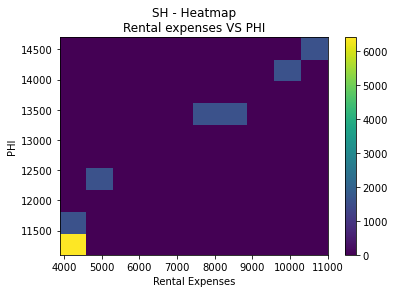

In [132]:
hist_sh_rent_phi = plt.hist2d(x = sh_rent_cost_all_pop, y = sh_phi_cost_all_pop, range = [[np.min(sh_rent_cost_all_pop),np.max(sh_rent_cost_all_pop)]
                                                                                      ,[np.min(sh_phi_cost_all_pop),np.max(sh_phi_cost_all_pop)]])
plt.xlabel("Rental Expenses")
plt.ylabel("PHI")
plt.title("SH - Heatmap\nRental expenses VS PHI")
plt.colorbar(hist_sh_rent_phi[3])

plt.show()




In [133]:
rg_rent_cost_all_pop = rg_rent_cost_all_pop_1

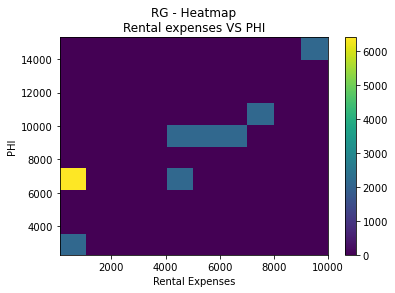

In [134]:
hist_rg_rent_phi = plt.hist2d(x = rg_rent_cost_all_pop, y = rg_phi_cost_all_pop, range = [[np.min(rg_rent_cost_all_pop),np.max(rg_rent_cost_all_pop)]
                                                                                      ,[np.min(rg_phi_cost_all_pop),np.max(rg_phi_cost_all_pop)]])
plt.xlabel("Rental Expenses")
plt.ylabel("PHI")
plt.title("RG - Heatmap\nRental expenses VS PHI")
plt.colorbar(hist_sh_rent_phi[3])
plt.show()


### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [135]:
p = [0.2,0.1,0.1,0.1,0.2,0.3]
n = 20
k =100
experiments = stats.multinomial(n,p).rvs(k) # create 100 samples for Xi

yi =experiments[:,1:4].sum(axis=1) # sum over rows= sum(yi = X1+X2+X3) how many time we saw Yi in each experiment

expected = ((yi-yi.mean())**3).mean() # subsract the mean elementwise 
print(expected)

1.4583359999999976


In [136]:
p_yi = 0.3 # x2+x3+x4 = 0.3
n=20
moment_from_class = n*p_yi*(1-p_yi)*(1-(2*p_yi))
moment_from_class

1.6799999999999997

In [141]:
third_moment = []
n_exp = np.arange(100,100000,500)

for i in range(100,100000,500):
    
    experiments = stats.multinomial(n,p).rvs(i) # create 100 samples for Xi

    yi =experiments[:,1:4].sum(axis=1) # sum over rows= sum(yi = X1+X2+X3) how many time we saw Yi in each experiment

    expected = ((yi-yi.mean())**3).mean() # subsract the mean elementwise 
    
    third_moment.append(expected)   

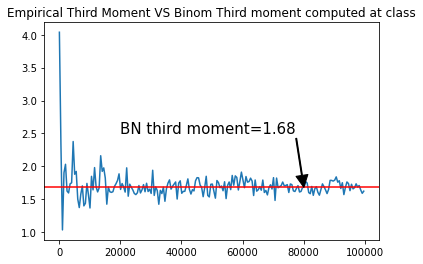

In [161]:
plt.plot(n_exp, third_moment)
plt.title("Empirical Third Moment VS Binom Third moment computed at class")

ax = plt.gca()
ax.axhline(moment_from_class, c='r')

ax.annotate('BN third moment='+str(np.round(moment_from_class,3)), xy=(80000,moment_from_class), xytext=(20000,2.5),size=15, arrowprops=dict(width=1, fc='black',lw=1))

plt.show()


From the graph it can be seen that the more experiments we perform the empirical third moment convergent to the Binom moment computed at class.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

We will start with displaying the formula of variance:

$V(X+Y+Z) = E{[(X+Y+Z)-E(X+Y+Z)]^2}$

The sum of expections values is equal to the some of each expection value alone**

$= E{[(X+Y+Z)-E(X)-E(Y)-E(Z)]^2}$

$= E{[(X-E(X))+(Y-E(Y))+(Z-E(Z))]^2}$

Using the definition of the following formula: 
$(a+b+c)^2 = a^2+2ab+2bc+b^2+2bc+c^2$
$a = X-E(X)$
$b = Y-E(Y)$
$c = Z-E(Z)$

Therfore: 

$= E[(X-E(X))^2]+2E[(X-E(X)(Y-E(Y)]+2E[(X-E(X)(Z-E(Z)]$
$+E[(Y-E(Y))^2]+2E[(Y-E(Y)(Z-E(Z)]+E[(Z-E(Z))^2]$

Using the variance definition: $V(T) = E[(T-E(T)^2]$

$= V(X)+V(Y)+V(Z)+2COV(X,Y)+2COV(X,Z)+2COV(Y,Z)$


We will start with proving that if X,Y are independent then the $COV(X,Y) = 0 $:

$= COV(X,Y) = E[(X-E(X))(Y-E(Y))]$

$= E[XY-XE(Y)-YE(X)+E(X)E(Y)]$

$= E[XY]-E(X)E(Y)-E(Y)E(X)+E(X)E(Y)$

$= E[XY]-E(X)E(Y)$

Because X and Y are independent $E[XY] = E[X]E[Y]$

$= E[X]E[Y]-E(X)E(Y) = -> 0$

Meaning that the cov of 2 independent variables is 0. 

Using What we have proven in the first section and what we have proven above the Variance of X,Y,Z given that they are pairwise independent:

$V(X+Y+Z) = V(X)+V(Y)+V(Z)+2COV(X,Y)+2COV(X,Z)+2COV(Y,Z)$

$-> V(X+Y+Z) = V(X)+V(Y)+V(Z)$ <br><br>

To prove that X,Y,Z are collectively independent the<b> all of the</b> following <b>conditions</b> needs to hold for all X,Y,Z: <br>
<ol>
<li>The events are pairwise independent:<br><br>
    <ul>
        <li>$P(x, y)= P(x)P(y)$</li>
        <li>$P(x, z)= P(x)P(z)$</li>
        <li>$P(z, y)= P(z)P(y)$</li>
    </ul>
    </li> <br>
    <li>$P(x, y, z)= P(x)P(y)P(z)$ </li>
</ol>
We will check if the two conditions hold in the following example: <br><br>
We define an experiment of two tosses of a fair coin.<br>  
X, Y, Z are three random variables over the same sample space $\Omega $ defined as:<br>
X - The result of the first toss is 0 {01, 00} <br>
Y - The result of the second toss is 0 {00, 10}. <br>
Z - The two tosses had the same result  {00, 11}. <br>
$\Omega=$ {00,01,10,11} <br>
<ul>
    <li>$P(X=0) = 0.5$</li>
    <li>$P(Y=0) = 0.5$</li>
    <li>$P(Z=\{00,11\}) = 0.5$</li>
</ul>
Let's Check if the two condidtions holds:<br>
<ol>
    <li>
        <ul>
            <li>$P(X \cap Y) = 0.25 = P(X)P(Y)$</li>
            <li>$P(X \cap Z) = 0.25 = P(X)P(Z)$</li>
            <li>$P(Y \cap Z) = 0.25 = P(Y)P(Z)$</li>
        </ul>
    </li>
      <li>$P(X \cap Y \cap Z) = 0.25 \neq P(X)P(Y)P(Z)=0.125$</li>
</ol>
Since one is violated, we can say that although the variables are pairwise independent, they are <b>not collectively independent</b>.

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [165]:
def NFoldConv(P:pd.DataFrame , n:int):
    values = P['values'].values
    probs = P['probs'].values
    initial_values = values
    initial_probs = probs
    
    for i in range(n-1):
        values, probs = np.add.outer(values, initial_values).reshape(-1), np.multiply.outer(probs, initial_probs).reshape(-1)
        df_values_probs = pd.DataFrame({'values':values,'probs':probs})
        Q = df_values_probs.groupby('values').agg('sum')
        Q.reset_index(inplace=True) # need to reset index since the values turns to the index itself when using group by
        values, probs = Q['values'].values, Q['probs'].values # create comulative values & probs
    return Q


#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [166]:
oct_edges = 8
n = 17

values = np.arange(1, oct_edges+1)
probs = (np.ones([oct_edges])/oct_edges)

oct_df = pd.DataFrame({'values':values,'probs':probs})

In [169]:
df_dist = NFoldConv(oct_df,n)

In [173]:
df_dist

,values,probs
0,17,4.440892e-16
1,18,7.549517e-15
2,19,6.794565e-14
3,20,4.303224e-13
4,21,2.151612e-12
...,...,...
115,132,2.151612e-12
116,133,4.303224e-13
117,134,6.794565e-14
118,135,7.549517e-15


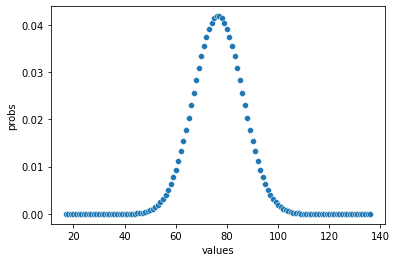

In [177]:
sns.scatterplot(x=df_dist['values'],y= df_dist['probs'])

plt.show()